<h1><center>SMS SPAM DETECTION</center></h1>


# <code style="background:PowderBlue;color:black">Task 
> Build an AI model that can classify SMS messages as spam orlegitimate. Use techniques like TF-IDF or word embeddings withclassifiers like Naive Bayes, Logistic Regression, or Support VectorMachines to identify spam messages

### <code style="background:Lavender;color:black">Importing Necessary Libraries

In [262]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### <code style="background:Lavender;color:black">Loading Dataset

In [263]:
sms_df=pd.read_csv("spam.csv",encoding="latin1")

In [264]:
sms_df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [265]:
sms_df.shape

(5572, 5)

> The dataset contains 5572 rows and 5 columns

### <code style="background:Lavender;color:black">Exploratory Data Analysis

In [266]:
sms_df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [267]:
sms_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [268]:
sms_df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

> There are more number of missing values in Unnamed 2,Unnamed 3 and Unnamed 4..We can drop the 3 columns

### <code style="background:Lavender;color:black">Dropping unwanted columns

In [269]:
sms_df.drop(columns=sms_df[['Unnamed: 2','Unnamed: 3','Unnamed: 4']],inplace=True)

In [270]:
### Rechecking the columns
sms_df.columns

Index(['v1', 'v2'], dtype='object')

In [271]:
sms_df.shape

(5572, 2)

> Now the dataset contains 5572 rows and 2 columns

### <code style="background:Lavender;color:black">Checking Null Values

In [272]:
sms_df.isnull().sum()

v1    0
v2    0
dtype: int64

> The dataset doesnot contain any null values

### <code style="background:Lavender;color:black">Renaming the columns

In [273]:
sms_df.columns=['Category','Messages']

In [274]:
sms_df

,Category,Messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


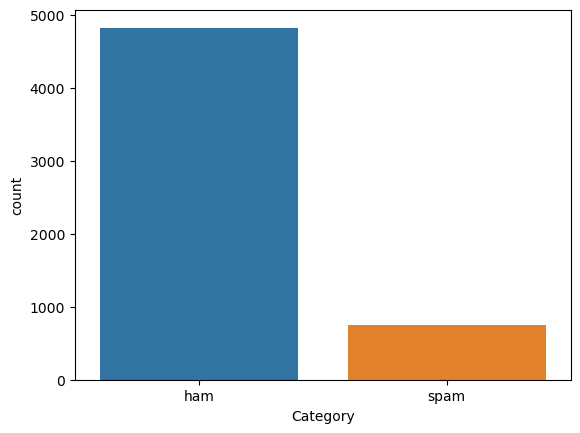

In [275]:
sns.countplot(x=sms_df['Category'])
plt.show()

> Ham messages are more compared to Spam messages

#### Converting the Ham/spam to Numerical data in Category Column

In [276]:
sms_df['Category']=sms_df['Category'].apply(lambda x:1 if x=="spam" else 0)

In [277]:
sms_df

,Category,Messages
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


### <code style="background:Lavender;color:black">Train Test Split

In [278]:
X=sms_df['Messages']
y=sms_df['Category']

In [279]:
from sklearn.model_selection import train_test_split

In [280]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [281]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [282]:
print(y.shape)
print(y_train.shape)
print(y_test.shape)

(5572,)
(4457,)
(1115,)


### Converting the text messages to numerical features using TF-IDF vectorizer

In [283]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [284]:
tdidf_vec = TfidfVectorizer(min_df=1, stop_words="english", lowercase=True)

In [285]:
X_train_feat=tdidf_vec.fit_transform(X_train)
X_test_feat=tdidf_vec.transform(X_test)


In [286]:
y_train.dtype

dtype('int64')

In [287]:
print(X_train)

1978    No I'm in the same boat. Still here at my moms...
3989    (Bank of Granite issues Strong-Buy) EXPLOSIVE ...
3935       They r giving a second chance to rahul dengra.
4078       O i played smash bros  &lt;#&gt;  religiously.
4086    PRIVATE! Your 2003 Account Statement for 07973...
                              ...                        
3772    I came hostel. I m going to sleep. Plz call me...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860                   In work now. Going have in few min.
Name: Messages, Length: 4457, dtype: object


## <code style="background:Lavender;color:black">Logistic Regression

In [288]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report


In [289]:
lr=LogisticRegression()
lr.fit(X_train_feat,y_train)

LogisticRegression()

In [290]:
y_pred_lr=lr.predict(X_test_feat)


In [291]:
lr_accuracy=accuracy_score(y_test,y_pred_lr)

In [292]:
print(lr_accuracy)

0.9524663677130045


In [293]:
print(classification_report(y_test,y_pred_lr))


              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115



## <code style="background:Lavender;color:black">Support Vector Machine

In [294]:
from sklearn import svm

In [295]:
svm=svm.SVC()
svm.fit(X_train_feat,y_train)

SVC()

In [296]:
y_pred_svm=svm.predict(X_test_feat)

In [297]:
svm_accuracy=accuracy_score(y_test,y_pred_svm)

In [298]:
print(svm_accuracy)

0.9766816143497757


In [299]:
print(classification_report(y_test,y_pred_svm))


              precision    recall  f1-score   support

           0       0.97      1.00      0.99       965
           1       0.99      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## <code style="background:Lavender;color:black">Naive Bayes 

In [300]:
from sklearn.naive_bayes import MultinomialNB


In [301]:
nb=MultinomialNB()

In [302]:
nb.fit(X_train_feat,y_train)

MultinomialNB()

In [303]:
y_pred_nb=nb.predict(X_test_feat)


In [304]:
nb_accuracy=accuracy_score(y_test,y_pred_nb)

In [305]:
print(nb_accuracy)

0.9668161434977578


In [306]:
print(classification_report(y_test,y_pred_nb))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



## Models Accuracy Comparision

In [307]:
models_accuracy=pd.DataFrame({'MODEL':['Logistic Regression','Support Vector Machine','Naive Bayes'],
                             'ACCURACY':[lr_accuracy,svm_accuracy,nb_accuracy]})

In [308]:
models_accuracy

,MODEL,ACCURACY
0,Logistic Regression,0.952466
1,Support Vector Machine,0.976682
2,Naive Bayes,0.966816


### Conclusion : 
> Support Vector Machine model shows high accuracy when compared to Logistic and Naive Bayes.SVM shows that it has better ability to perform effectively in identifying Spam messages